In [3]:
import math
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from sympy.abc import beta
from scipy.integrate import quad
from scipy.optimize import curve_fit
from sympy import I
from IPython.display import display, HTML

## Make some initial plots

In [30]:
N = 6.022E23
k = 1.381E-23
R = N*k
n = 1
T = np.linspace(0.2, 10, 2)
a = 3.832 * 101.325   #NO2
b = 0.04415 

min = n*b+1E-4
V = np.linspace(min,1E5, 25000000)
P = np.zeros((T.size,V.size))
def P_(V,T): return (n*R*T)/(V-n*b) - (a*n**2)/V**2
for i in range(T.size):
    P[i] = P_(V, T[i])

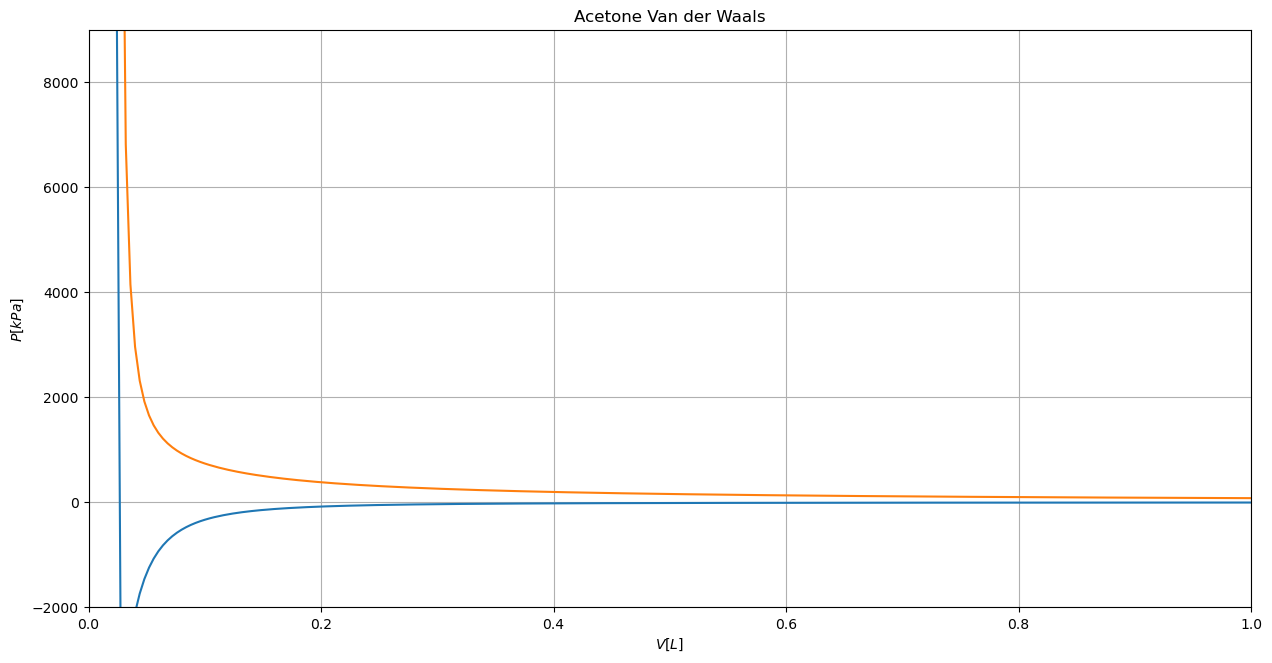

In [31]:
fig = plt.figure(figsize=(15,7.5))
ax0 = fig.add_subplot(1, 1, 1, xlabel='$V [L]$', ylabel='$P [kPa]$', ylim=(-2000, 9000), xlim=(0, 1), title='Acetone Van der Waals')
ax0.grid()
for i in range(T.size):
    ax0.plot(V, P[i,:])

In [32]:
i = 0
G = -n*R*T[i]*np.log(V-n*b)+((n**2*R*T[i]*b)/(V-n*b))-((2*a*n**2)/V)

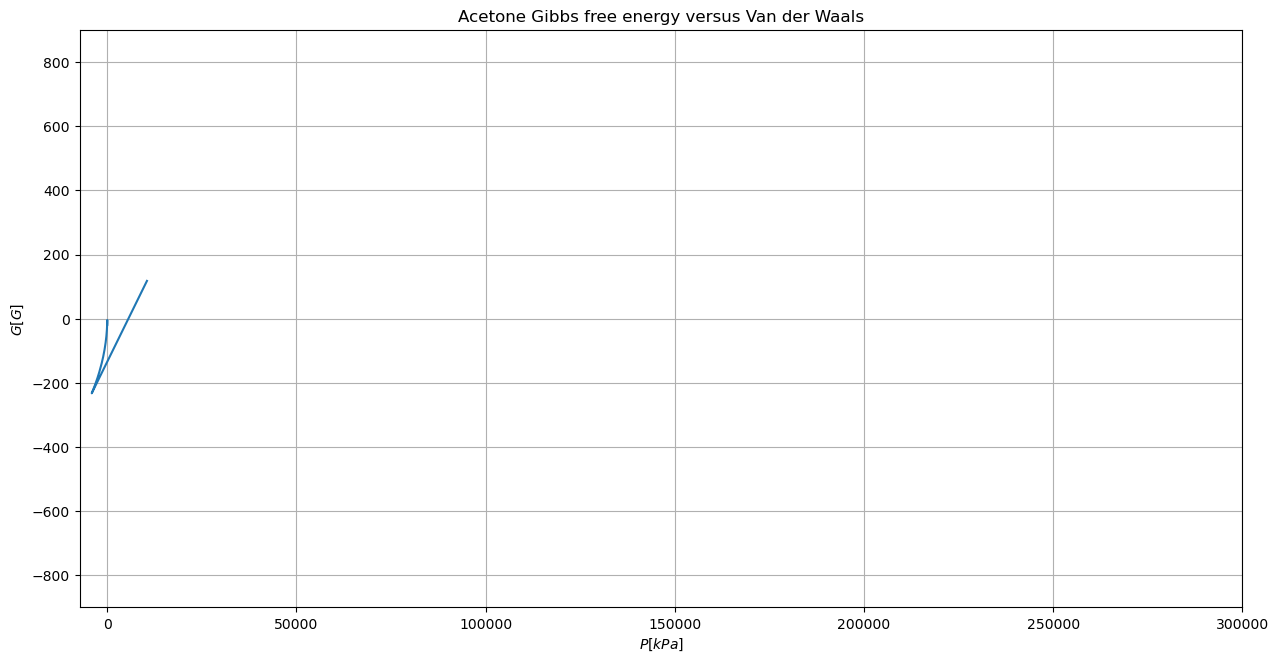

In [33]:
fig = plt.figure(figsize=(15,7.5))
ax0 = fig.add_subplot(1, 1, 1, xlabel='$P [kPa]$', ylabel='$G [G]$', ylim=(-900, 900), xlim=(-7250, 300000), title='Acetone Gibbs free energy versus Van der Waals')
ax0.grid()
ax0.plot(P[i], G)

## Find upper iostherm

Focusing in on the highest isotherm for which there is only one point of inflection from the minimum volume to infinity b < V < inf.


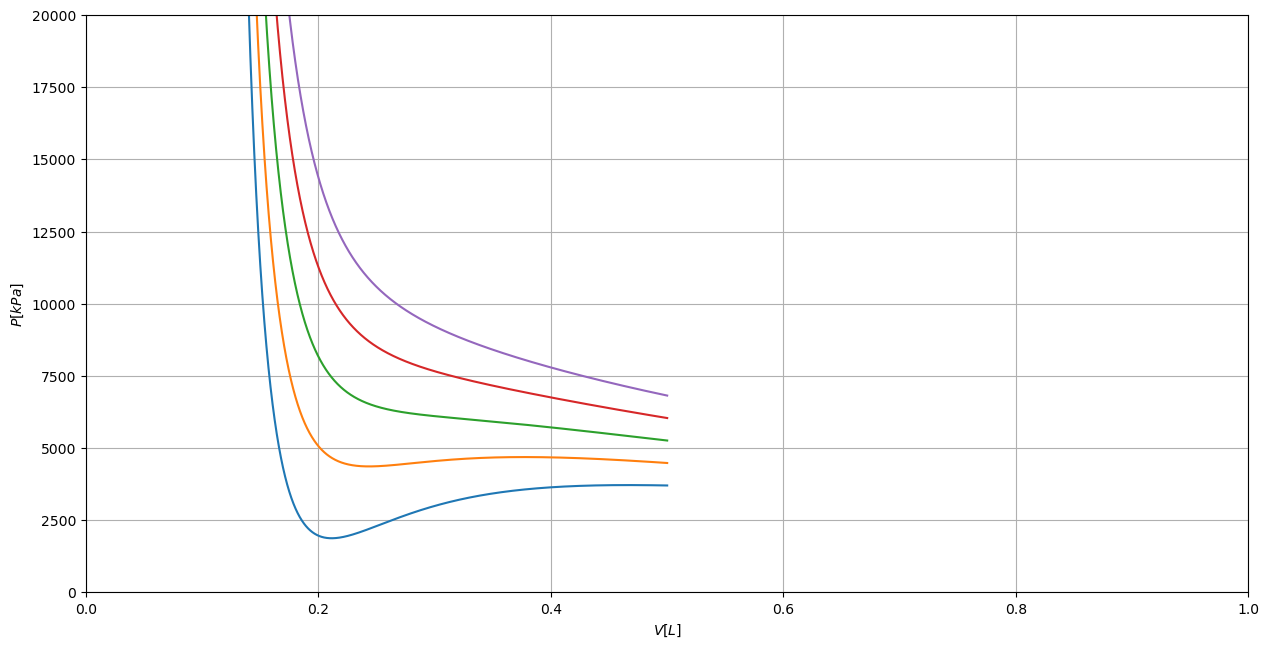

In [12]:
T = np.linspace(450, 600, 5)

min = n*b+1E-4
V = np.linspace(min, 0.5, 25000)
P = np.zeros((T.size,V.size))
def P_(V,T): return (n*R*T)/(V-n*b) - (a*n**2)/V**2
for i in range(T.size):
    P[i] = P_(V, T[i])

fig = plt.figure(figsize=(15,7.5))
ax0 = fig.add_subplot(1, 1, 1, xlabel='$V [L]$', ylabel='$P [kPa]$', ylim=(0, 20000), xlim=(0, 1))
ax0.grid()
for i in range(T.size):
    ax0.plot(V, P[i,:])

print('Focusing in on the highest isotherm for which there is only one point of inflection from the minimum volume to infinity b < V < inf.')

In [13]:
min = n*b+1E-4
T = np.linspace(500, 510, 500)
V = np.linspace(min+0.15, 0.5, 25000)
for i in range(T.size):               ### HERE I'M TAKING THE HIGHEST ISOTHERM WITH ONLY ONE FIRST DERIVATIVE ZERO
    P = P_(V, T[i])                   ### BY NUMERICALLY SEARCHING FOR A SET OF TWO POINTS WHERE DP/DV < 0
    d = 0
    for j in range(V.size-1):
        if P[j+1] > P[j]:
            d = 1
    if d == 0:
        T_upper = T[i]
        break

Curiously the computed value is off from the given value of 508 K.

T upper therm = 505.190 K


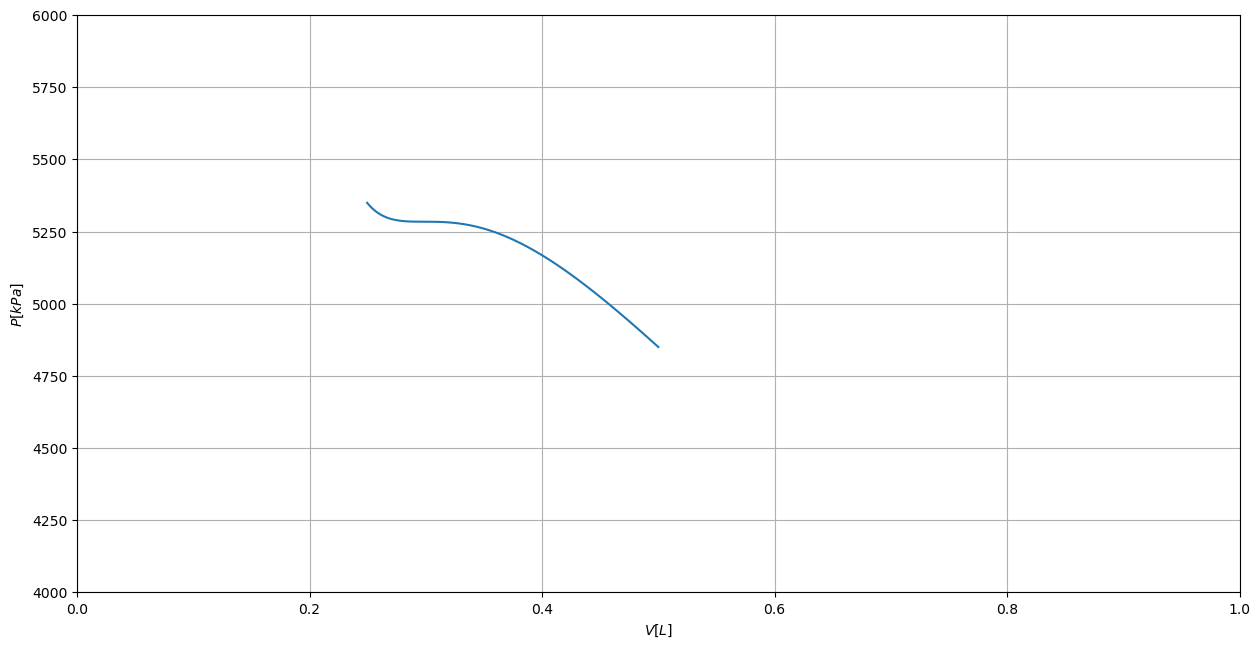

In [14]:
fig = plt.figure(figsize=(15,7.5))
ax0 = fig.add_subplot(1, 1, 1, xlabel='$V [L]$', ylabel='$P [kPa]$', ylim=(4000, 6000), xlim=(0, 1))
ax0.grid()
ax0.plot(V, P)
print ('T upper therm = {0:0.3f} K'.format(T_upper))

### Isotherm range plot 
Next I plot some isotherms across the range of temperatures I will compute the vapor pressure curve for. I only chose to compute down to the T = 120 K isotherm because it's below the triple point ( I think that's an OK reason ) and it gets increasingly annoying to compute the vapor pressure line for temperatures approaching 0 K.

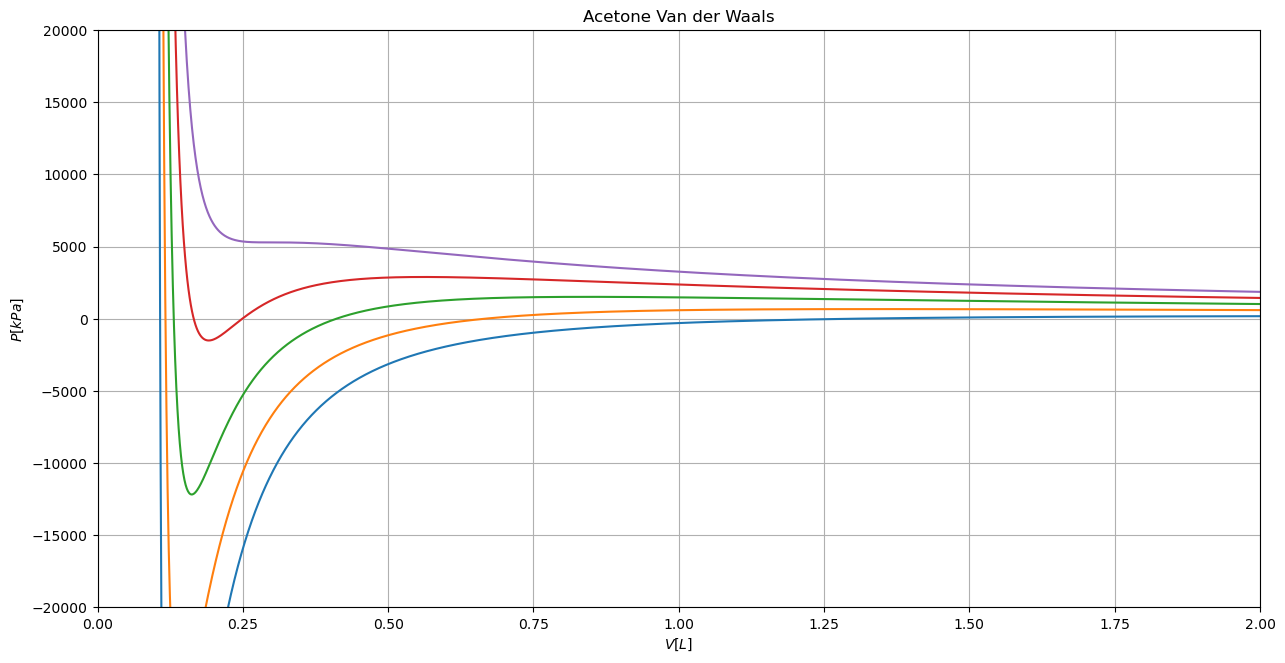

In [15]:
T = np.linspace(120, T_upper-1E-4, 5)

min = n*b+1E-4
V = np.linspace(min, 1000, 1000000)
P = np.zeros((T.size,V.size))
def P_(V,T): return (n*R*T)/(V-n*b) - (a*n**2)/V**2
for i in range(T.size):
    P[i] = P_(V, T[i])

fig = plt.figure(figsize=(15,7.5))
ax0 = fig.add_subplot(1, 1, 1, xlabel='$V [L]$', ylabel='$P [kPa]$', ylim=(-20000, 20000), xlim=(0, 2), title='Acetone Van der Waals')
ax0.grid()
for i in range(T.size):
    ax0.plot(V, P[i,:])

### The two cells below are to make sure that the data set of the lowest used isotherm contains all three points 2, 4, and 6.

In [16]:
T=120
V = np.linspace(min, 100000, 10000000)
P = P_(V, T)
G = -n*R*T*np.log(V-n*b)+((n**2*R*T*b)/(V-n*b))-((2*a*n**2)/V)

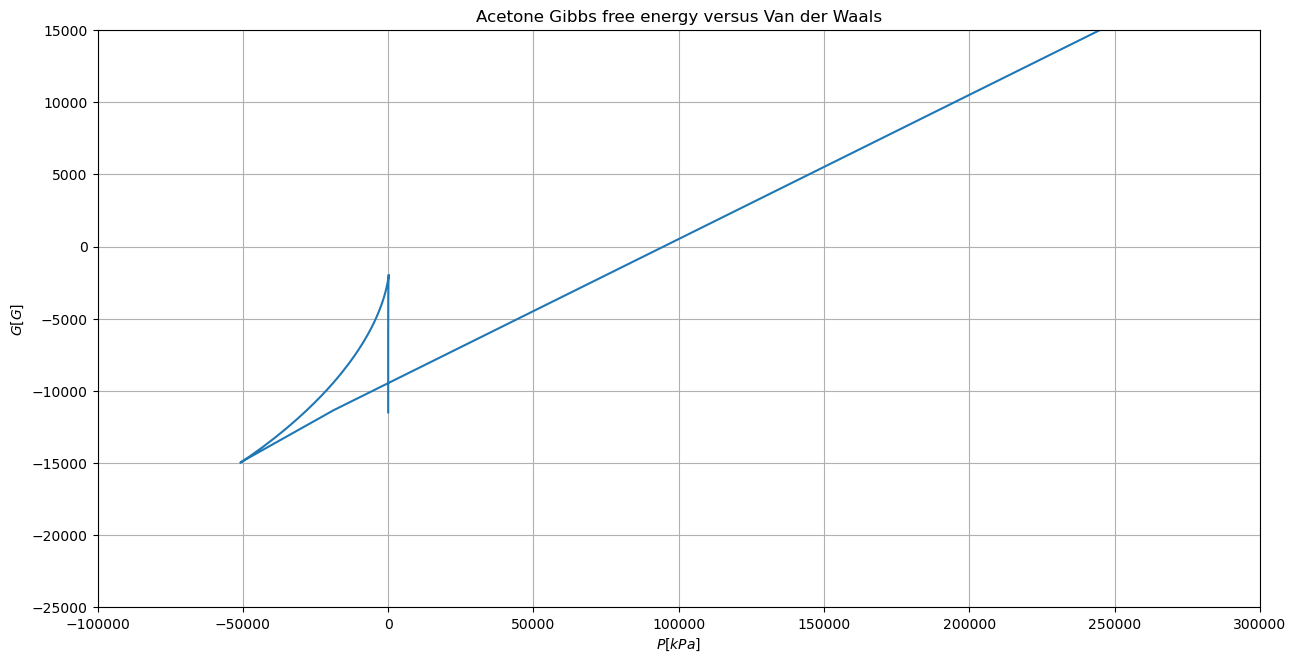

In [17]:
fig = plt.figure(figsize=(15,7.5))
ax0 = fig.add_subplot(1, 1, 1, xlabel='$P [kPa]$', ylabel='$G [G]$', ylim=(-25000, 15000), xlim=(-100000, 300000), title='Acetone Gibbs free energy versus Van der Waals')
ax0.grid()
ax0.plot(P, G)

## Find volumes for points 3 and 5

In [18]:
min = n*b+1E-4
T = np.linspace(120, T_upper-0.5, 50)
V = np.linspace(min, 100000, 10000000)
v3 = np.zeros(T.size)
v5 = np.zeros(T.size)
for i in range(T.size):    ### FINDING THE LOCAL MIN AND MAX HERE FOR POINTS 3 AND 5
    P = P_(V, T[i])
    v5_check = 0
    for j in range(V.size-1):
        if P[j+1] > P[j] and v5_check == 0:
            v5[i] = V[j]
            v5_check = 1
            continue
        if P[j+1] < P[j] and v5_check == 1:
            v3[i] = V[j]
            break

I'm leaving this here for no good reason. I had wanted to see these values to insure that when at the time I was truncating some of the data that I was still able to capture points of interest.

In [19]:
p_max = P_(V[0], T[1])
p_min = P_(V[-1], T[1])
p_max
p_min

10490202.880655637

0.010632432550847087

In [21]:
def v_mid(p_max, p_min, v5, v3, V, T):  ### FIND THREE VOLUMES THAT CORRESPOND TO THE SAME PRESSURE
    p_mid = (p_max + p_min)/2           ### POINTS 2, 4, AND 6
    v6 = v_find(p_mid, V[0], v5, T)
    v4 = v_find(p_mid, v5, v3, T)
    v2 = v_find(p_mid, v3, V[-1], T)
    return v6, v4, v2

def v_find(p, vi, vf, T):               ### BINARY SEARCH FOR PRESSURE CORDINATE BETWEEN TWO VOLUMES
    s = np.linspace(vi, vf, 1000000)
    thresh = 1E-6
    if P_(vi, T) > P_(vf, T):
        if abs(abs(P_(s[0], T)) - abs(p)) < thresh:
            v = s[0]
            return v
        if abs(abs(P_(s[-1], T)) - abs(p)) < thresh:
            v = s[-1]
            return v
        s_max = s[0]
        s_min = s[-1]
        for j in range(s.size):
            s_mid = (s_max + s_min)/2
            if abs(abs(P_(s_mid, T)) - abs(p)) < thresh:
                v = s_mid
                break
            elif P_(s_mid, T) > p:
                s_max = s_mid
            elif P_(s_mid, T) < p:
                s_min = s_mid
                
    if P_(vi, T) < P_(vf, T):
        if abs(abs(P_(s[0], T)) - abs(p)) < thresh:
            v = s[0]
            return v
        if abs(abs(P_(s[-1], T)) - abs(p)) < thresh:
            v = s[-1]
            return v
        s_max = s[-1]
        s_min = s[0]
        for j in range(s.size):
            s_mid = (s_max + s_min)/2
            if abs(abs(P_(s_mid, T)) - abs(p)) < thresh:
                v = s_mid
                break
            elif P_(s_mid, T) > p:
                s_max = s_mid
            elif P_(s_mid, T) < p:
                s_min = s_mid
    return v

def P_lift(V,T, h): return (n*R*T)/(V-n*b) - (a*n**2)/V**2 + h  ### ADDS A HEIGHT TO P(V) ENABLING PROPER MAXWELL CONSTRUCTION
                                                                ### VOLUME CALCULATION

def diff_(v6, v4, v2, T, v5):                    ### RETURN THE DIFFERENCE BETWEEN THE TWO AREAS OF THE MAXWELL CONSTRUCTION
    h = abs(P_(v5, T))                        
    A1, A1_err = quad(P_lift, v6, v4, args = (T, h, ))
    A2, A2_err = quad(P_lift, v4, v2, args = (T, h, ))
    p = P_lift(v4, T, h)
    diff = (p*(v4-v6) - A1) - (A2 - p*(v2-v4))
    return diff

In [22]:
diff = 1
p = np.zeros(T.size)
v6 = V[0]
v2 = V[-1]

for i in range(T.size):             ### FIND ALL PRESSURES THAT CORRESPOND TO POINTS 2, 4, AND 6
    diff = 1
    p_max = P_(V[0], T[i])
    p_min = P_(V[-1], T[i])
    if p_max > P_(v3[i], T[i]):
        p_max = P_(v3[i], T[i])
    if p_min < P_(v5[i], T[i]):
        p_min = P_(v5[i], T[i])
    while abs(diff) > 1E-2:     ### I CHOSE TO GO WITH THIS THRESHOLD. A SMALLER ONE CAN BE ACHIVED EASILY AT HIGHER TEMPERATURES
                                                                   ### THE ALGORITH DOESN'T SEEM TO WANT TO CONVERGE VERY WELL FOR LOWER TEMPS
        v6, v4, v2 = v_mid(p_max, p_min, v5[i], v3[i], V, T[i])    ### THE HIGHER THRESHOLD SEEMS TO NOT BE ALL THAT CRITICAL
        #print(i, diff, v6, v4, v2, P_(v4, T[i]), p_max, p_min)
        # if P_(v4, T[i]) < 0:
        #     p[i] = np.nan
        #     continue
        p[i] = P_(v4, T[i])
        diff = diff_(v6, v4, v2, T[i], v5[i])


            
        if diff > 0:
            p_max = (p_max + p_min)/2
        if diff < 0:
            p_min = (p_max + p_min)/2

## Plotting the vapor pressure line
The main annoyance that comes with plotting lower and lower isotherms is how far out the P(V) diagram has to go, as in V getting very large. The lower the temperature the farther out point 2 gets.

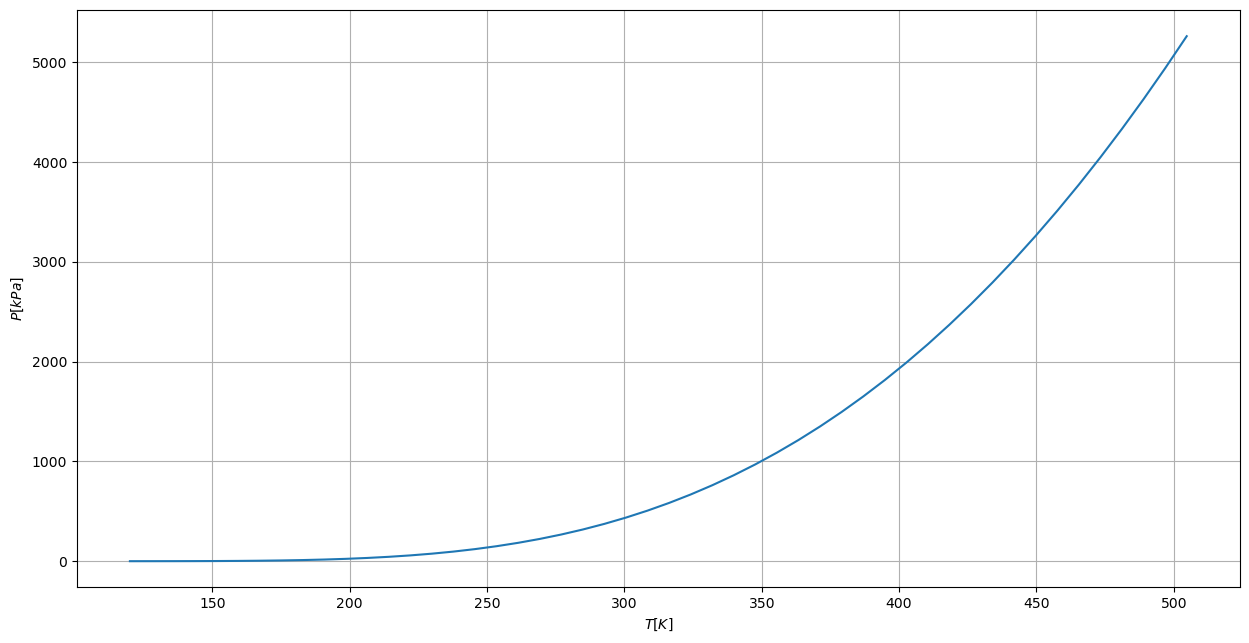

In [24]:
fig = plt.figure(figsize=(15,7.5))
ax0 = fig.add_subplot(1, 1, 1, xlabel='$T [K]$', ylabel='$P [kPa]$')
ax0.grid()
ax0.plot(T, p)

For my next trick I will fit the curve so I can easily get values for pressure along the vapor pressure curve from temperatures. I figure using a sixth degree polynomial might suffice. 

In [25]:
def func(x, a, b, c, d, e, f, g): return a*x**6 + b*x**5 + c*x**4 + d*x**3 + e*x**2 + f*x + g

array([2.82431372e-14, 5.30016107e-11, 4.00868400e-08, 1.55848018e-05,
       3.27253252e-03, 3.50625205e-01, 1.49287489e+01])

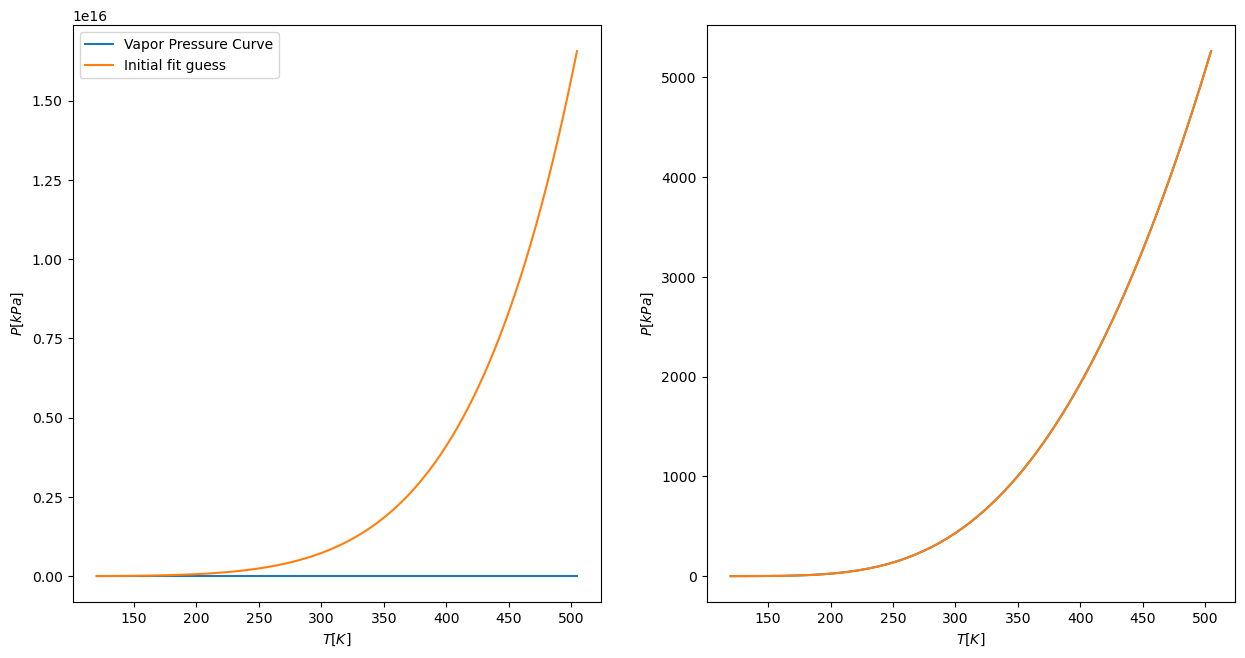

In [26]:
fig = plt.figure(figsize=(15,7.5))
ax0 = fig.add_subplot(1, 2, 1, xlabel='$T [K]$', ylabel='$P [kPa]$')
ax0.grid()
ax0.plot(T, p, label='Vapor Pressure Curve')
x = np.linspace(T.min(), T.max(), 1000)
p0 = [1, 1, 1, 1, 1, 1, 1]
y = func(x, *p0)
ax0.plot(x,y, label='Initial fit guess')
ax0.legend()
ax1 = fig.add_subplot(1, 2, 2, xlabel='$T [K]$', ylabel='$P [kPa]$')
popt, pcov = curve_fit(func, T, p, p0=p0)
ax1.plot(T, p, label='Vapor Pressure Curve')
ax1.plot(x, func(x, *popt))
ax0.grid()
perr = np.sqrt(np.diag(pcov))
perr

Visually the points along the vapor pressure curve fit seem to fit decently 

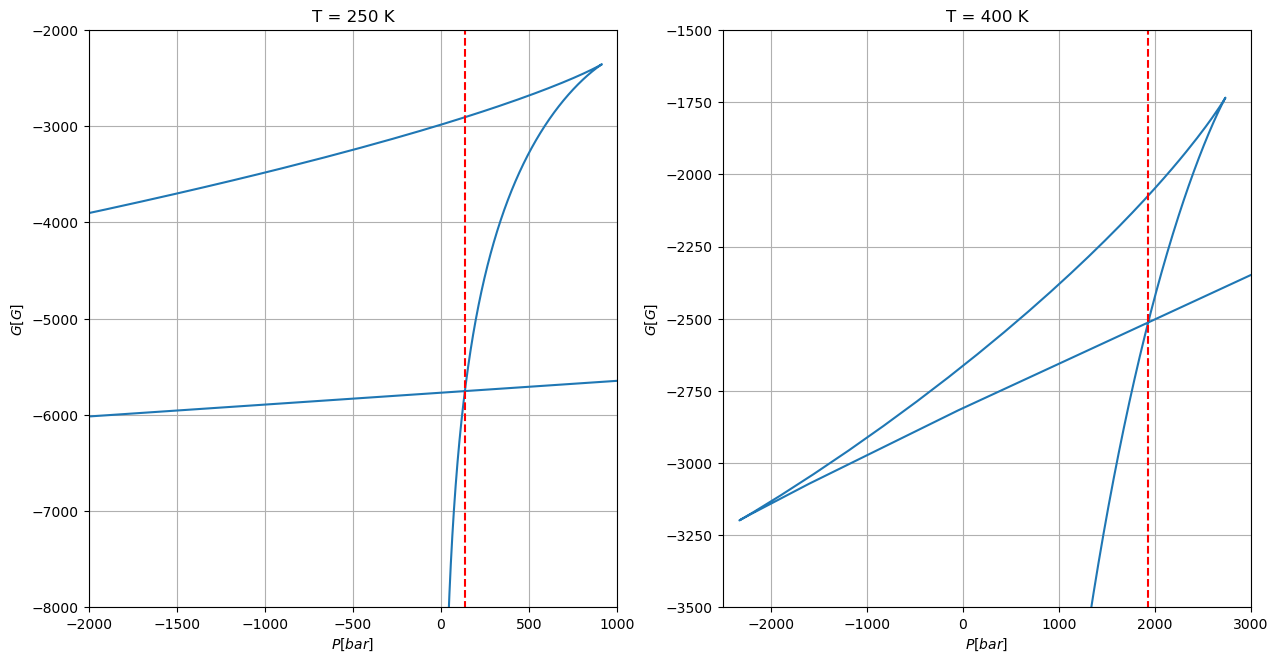

In [27]:
T = np.array([250, 400])
V = np.linspace(min, 100000, 10000000)
P = np.zeros((T.size,V.size))
G = np.zeros((T.size,V.size))
vpp = np.zeros(T.size)
for i in range(T.size):
    P[i] = P_(V, T[i])
    G[i] = -n*R*T[i]*np.log(V-n*b)+((n**2*R*T[i]*b)/(V-n*b))-((2*a*n**2)/V)
    vpp[i] = func(T[i], *popt)
fig = plt.figure(figsize=(15,7.5))
ax0 = fig.add_subplot(1, 2, 1, xlabel='$P [bar]$', ylabel='$G [G]$', ylim=(-8000, -2000), xlim=(-2000, 1000), title='T = 250 K')
ax0.grid()
ax0.plot(P[0,:], G[0,:])
ax0.vlines(vpp[0], -1E5, 1E5, color='red', linestyles='dashed')
ax0 = fig.add_subplot(1, 2, 2, xlabel='$P [bar]$', ylabel='$G [G]$', ylim=(-3500, -1500), xlim=(-2500, 3000), title='T = 400 K')
ax0.grid()
ax0.plot(P[1,:], G[1,:])
ax0.vlines(vpp[1], -1E5, 1E5, color='red', linestyles='dashed')

In [28]:
func(297, *popt)

407.8336828534725